In [9]:
pip install pykalman


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_excel("C:\\Users\\Admin\\Desktop\\SOP data.xlsx")
import re
def conve(x):
 return re.findall(r'\d+',x)[0]
df["size"]=df['Size'].apply(conve)
df = df.astype({'size':'int'})
df["event"]=df['Event'].apply(conve)
df = df.astype({'event':'int'})
df=df[['Time','event','size','Name','from']]
df1=df.groupby('event').first()
df=df[df['Name']=='sourcePacket']
df2=df1[df1['from']=='src[0]']
ts=df2[['Time']]
ts

,Time
event,
5,0.000000
127,0.000978
248,0.002003
355,0.002860
498,0.004080
...,...
116016,1.127222
116095,1.127897
116167,1.128527


In [5]:
x_train=ts.iloc[0:516,0:].values
y_test=ts.iloc[516:,0:].values


In [6]:
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

In [7]:
filtered_state_means= kf.filter(true_values)
filtered_state_means

NameError: name 'true_values' is not defined

In [29]:
forecasted_state_means, _ = kf.smooth(true_values)

AttributeError: 'KalmanFilter' object has no attribute 'predict'

In [ ]:
import matplotlib.pyplot as plt

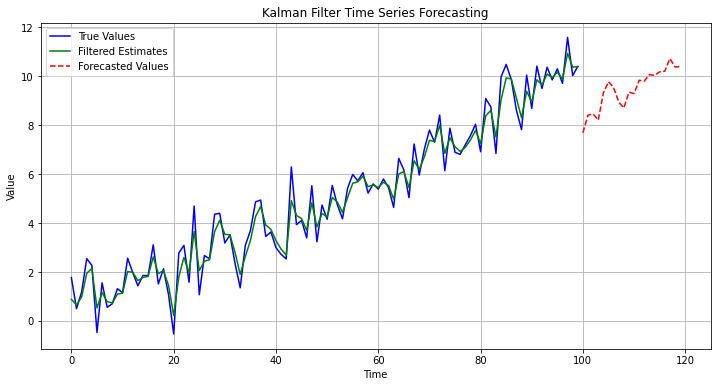

In [19]:
n_steps_forecast = 20
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Values', color='blue')
plt.plot(filtered_state_means, label='Filtered Estimates', color='green')
plt.plot(np.arange(n_samples, n_samples + n_steps_forecast), forecasted_state_means[-n_steps_forecast:], label='Forecasted Values', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filter Time Series Forecasting')
plt.legend()
plt.grid(True)
plt.show()

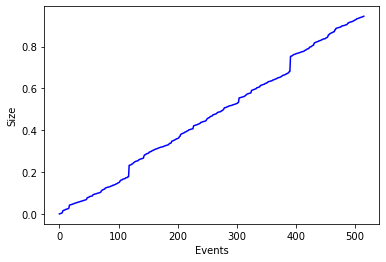

In [8]:
plt.plot(x_train, label='x_train', color='blue')
plt.xlabel('Events')
plt.ylabel('Size')
plt.savefig('C:\\Users\\Admin\\Desktop\\fig1.pdf')
plt.show()

In [9]:
filtered_state_means, _ = kf.filter(x_train)

In [10]:
forecasted_state_means, _ = kf.smooth(x_train)

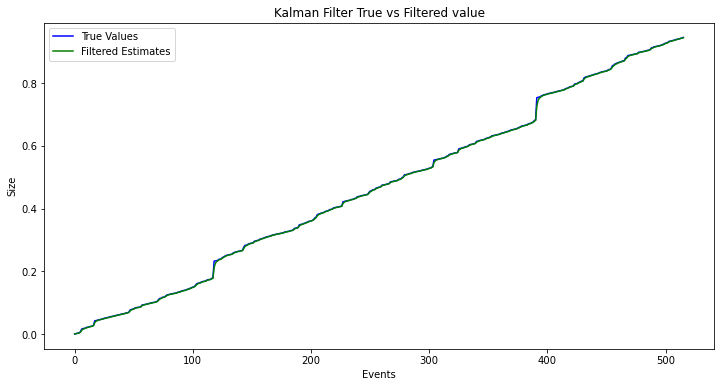

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(x_train, label='True Values', color='blue')
plt.plot(filtered_state_means, label='Filtered Estimates', color='green')
plt.xlabel('Events')
plt.ylabel('Size')
plt.legend()
plt.title("Kalman Filter True vs Filtered value")
plt.savefig('C:\\Users\\Admin\\Desktop\\fig2.pdf')
plt.show()

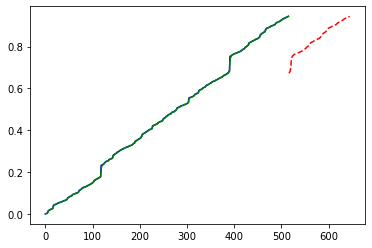

In [20]:
plt.plot(x_train, label='True Values', color='blue')
plt.plot(filtered_state_means, label='Filtered Estimates', color='green')
plt.plot(np.arange(516, 516 + n_steps_forecast), forecasted_state_means[-n_steps_forecast:], label='Forecasted Values', color='red', linestyle='--')
plt.show()

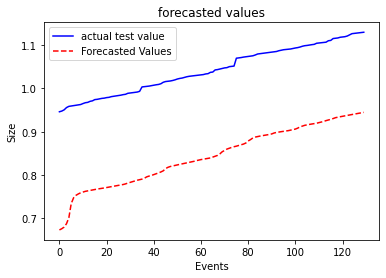

In [12]:
n_steps_forecast=130
#plt.plot(x_train, label='True Values', color='blue')
#plt.plot(filtered_state_means, label='Filtered Estimates', color='green')
plt.plot(y_test[0:],color='blue',label='actual test value')
plt.plot( forecasted_state_means[-n_steps_forecast:], label='Forecasted Values', color='red', linestyle='--')
plt.xlabel('Events')
plt.ylabel('Size')
plt.legend()
plt.yticks()
plt.title("forecasted values")

plt.show()


In [19]:
forecasted_state_means=forecasted_state_means.reshape(-1)
y_test=y_test.reshape(-1)
forecasted_state_means.shape

(516,)

In [22]:
df = pd.DataFrame({'actual_time':y_test , 'MA':forecasted_state_means[-n_steps_forecast:] })
df

,actual_time,MA
0,0.946063,0.672956
1,0.947657,0.675713
2,0.950491,0.679527
3,0.955711,0.687285
4,0.958514,0.701102
...,...,...
125,1.127222,0.940671
126,1.127897,0.941708
127,1.128527,0.942761
128,1.129117,0.943876


In [26]:
df['theta']=df['actual_time']-df['MA']
df['theta'].mean()

0.1988062997683068

In [27]:
df['Changed']=df['MA']+0.1988062997683068
df

,actual_time,MA,theta,Changed
0,0.946063,0.672956,0.273106,0.871763
1,0.947657,0.675713,0.271944,0.874519
2,0.950491,0.679527,0.270964,0.878333
3,0.955711,0.687285,0.268427,0.886091
4,0.958514,0.701102,0.257412,0.899908
...,...,...,...,...
125,1.127222,0.940671,0.186551,1.139478
126,1.127897,0.941708,0.186188,1.140515
127,1.128527,0.942761,0.185766,1.141567
128,1.129117,0.943876,0.185241,1.142682


In [28]:
from sklearn.metrics import r2_score
r2=r2_score(df['actual_time'],df['Changed'])
r2

0.9027464151814728